## Task-3: EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
## importing the neceesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
#importing the datset
data=pd.read_csv("spam_ham_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


In [4]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0 label                                               text  \
0           605   ham  Subject: enron methanol ; meter # : 988291\nth...   
1          2349   ham  Subject: hpl nom for january 9 , 2001\n( see a...   
2          3624   ham  Subject: neon retreat\nho ho ho , we ' re arou...   
3          4685  spam  Subject: photoshop , windows , office . cheap ...   
4          2030   ham  Subject: re : indian springs\nthis deal is to ...   
..          ...   ...                                                ...   
694        4043  spam  Subject: cruise 3 nts mexico only $ 197 ! - - ...   
695        1087   ham  Subject: july 2000 - hpl estimates and nominat...   
696        1446   ham  Subject: hpl expense contracts\nfyi . . . . . ...   
697         252   ham  Subject: president @ juno . com : exciting new...   
698        2709   ham  Subject: tenaska iv 1 / 01\nwe need to change ...   

     label_num  
0            0  
1            0  
2 

## Exploratory Data Analysis

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns=['Label','Text','Label_Number']
data.head()

,Label,Text,Label_Number
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


In [6]:
data.shape

(699, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         699 non-null    object
 1   Text          699 non-null    object
 2   Label_Number  699 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.5+ KB


In [8]:
## Checking null values
data.isnull().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

### There are no missing values

In [9]:
#Checking the counts of spam and ham
data['Label_Number'].value_counts()

0    496
1    203
Name: Label_Number, dtype: int64

496 is Ham and 203 is spam

<AxesSubplot: xlabel='Label', ylabel='count'>

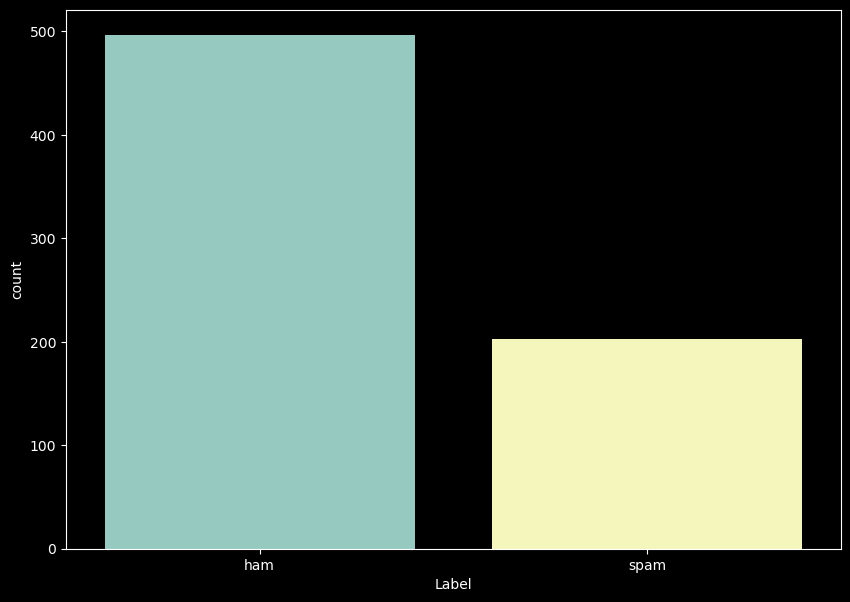

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(10,7))
sns.countplot(data=data,x="Label")

## Feature Extraction

In [11]:
X=data.loc[:,'Text'] # independent
y=data.loc[:,'Label_Number']
X.shape ,y.shape

((699,), (699,))

In [12]:
# Import the CountVectorizer class from the scikit-learn library.
from sklearn.feature_extraction.text import CountVectorizer
# Create a CountVectorizer object.
cv = CountVectorizer()
X = cv.fit_transform(data.Text)
y = data.Label

## Model Training

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC

In [15]:
models = {
"Random Forest": {"model":RandomForestClassifier(), "perf":0},
"Gradient Boosting": {"model":GradientBoostingClassifier(), "perf":0},
"MultinomialNB": {"model":MultinomialNB(), "perf":0},
"Logistic Regr.": {"model":LogisticRegression(), "perf":0},
"KNN": {"model":KNeighborsClassifier(), "perf":0},
"Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
"SVM (Linear)": {"model":LinearSVC(), "perf":0},
"SVM (RBF)": {"model":SVC(), "perf":0}
}

In [16]:
from time import perf_counter
for name, model in models.items():
    start = perf_counter()
    model['model'].fit(X_train, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 0.5 sec
Gradient Boosting    trained in 2.17 sec
MultinomialNB        trained in 0.0 sec
Logistic Regr.       trained in 0.71 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.08 sec
SVM (Linear)         trained in 0.06 sec
SVM (RBF)            trained in 0.13 sec


In [17]:
from sklearn.metrics import accuracy_score
models_accuracy = []
for name, model in models.items():
    accuracy = model["model"].score(X_test, y_test)
    models_accuracy.append([name, accuracy, model["perf"]])
models_accuracy1 = []
for name, model in models.items():
    accuracy = model["model"].score(X_train, y_train)
    models_accuracy1.append([name, accuracy, model["perf"]])

In [18]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,Gradient Boosting,0.982857,2.17
1,Logistic Regr.,0.977143,0.71
2,MultinomialNB,0.971429,0.00
3,SVM (Linear),0.960000,0.06
4,Random Forest,0.948571,0.50
5,Decision Tree,0.914286,0.08
6,KNN,0.822857,0.00
7,SVM (RBF),0.777143,0.13


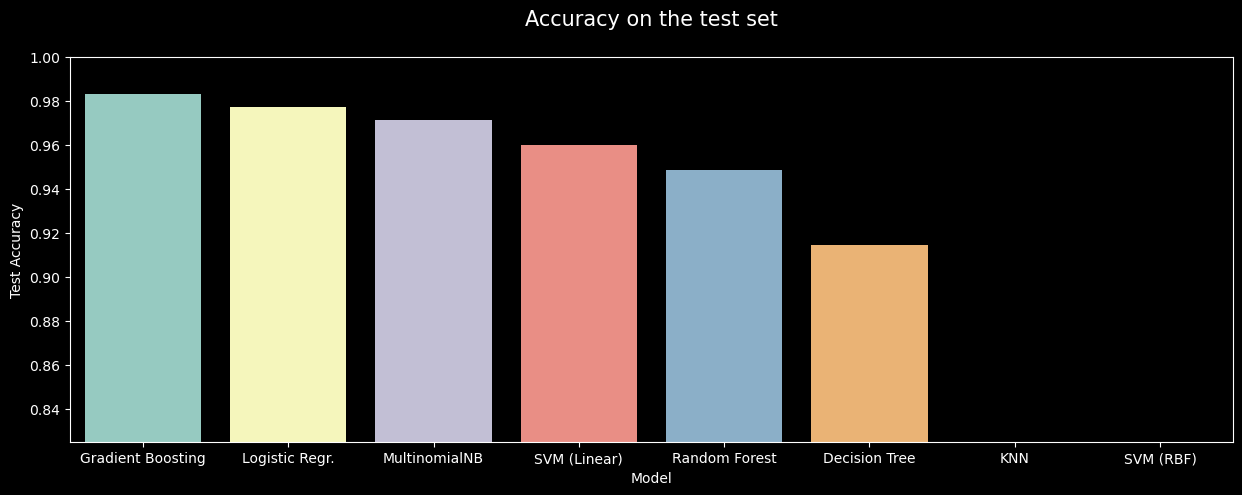

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

### GradientBoosting gives the best results in terms of Test Accuracy